In [67]:
import numpy as np
import pandas as pd
#train=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
#test=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
#submission=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")
#ROC이용
print(train.shape,test.shape,submission.shape)#크기가 16:11이네?

(165034, 14) (110023, 13) (110023, 2)


In [68]:
#1. 순서형변수(NumOfProuducts) 그래프로 그려서 onehot쓸지 안쓸지 정리
#2. 중복된 customer Id인지 아닌지에 따라 Exited가 왔다갔다하는지 아닌지 찾아봐야함
#3. train과 test분포에 대해서 생각해봐야함
#4. 불균형 데이터 어케 처리할꺼임?

In [69]:
train.head(10)
train.head().T#행열위치바꾸기(행이 너무 많잖어~)
#test.head()
#submission.head()

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


id:아이디임 (고유값이라는 정보가 있었음)  
CustomerId: 고객 아이디임 (고유값 아니라는 정보가 있었음)  
Surname: 이름(성)  
CreditScore :신용점수  
Geography :나라(지역)  
Gender :성별  
Age: 나이  
Tenure : 고객의 가입기간  
Balance:고객의 개정 잔고  
NumOfProducts: 고객이 보유하고 있는 금융 상품(제품)의 수를 나타내는 숫자.  
HasCrCard: 신용카드 보유 여부를 나타내는 이진 변수 (1 또는 0).  
IsActiveMember: 고객이 활성 회원인지 여부를 나타내는 이진 변수 (1 또는 0).  
EstimatedSalary: 고객의 추정 연봉을 나타내는 숫자.  
Exited: 고객이 은행에서 이탈한 여부를 나타내는 이진 변수 (1 또는 0). 여기서 "Exited"가 1이면 이탈한 것을 나타냅니다.  
ROC를 이용한다고 함

In [70]:
train.info() #겉보기에 null없음 int6개 float4개  object 3개임
test.info() #겉보기에 null 없음  int5개 float4개 object 3개임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110

In [71]:
train.describe() #최소값 주로보는데 나이는 18세이상 성인이고 가입기간이 0인게 있네?
#test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [72]:
#피처 요약표 만들기
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
  
    return summary
resumetable(train)

#확실히 고유값 부분에서 CustomerId는 같지가 않아 왜?? 이거 생각보다 중요할 지도?
#Geography는 3곳밖에 없나보네 France,Spain,Germany
#Age를 어떻게 처리할까...그룹화할까 고민
#Tenure이 가입기간같은건데 0에서 10사이고  년별로 10개네 이것도 int인데 그룹화 시켜야하나?
#NumofProducts이 친구도 int인데 이건 object화시키거나 Category화시켜야겠네 이거 제품개수 4개밖에 안됨 (1~4)
#HashCrCard 이진인데 float임 이거 bin으로바꾸기
#IsActiveMember이것도 이진인데 float임 bin으로 바꾸기
#Exited도 이진인데 int네 이것도 바꾸기

데이터 세트 형상: (165034, 14)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,int64,0,165034,0,1,2
1,CustomerId,int64,0,23221,15674932,15749177,15694510
2,Surname,object,0,2797,Okwudilichukwu,Okwudiliolisa,Hsueh
3,CreditScore,int64,0,457,668,627,678
4,Geography,object,0,3,France,France,France
5,Gender,object,0,2,Male,Male,Male
6,Age,float64,0,71,33.0,33.0,40.0
7,Tenure,int64,0,11,3,1,10
8,Balance,float64,0,30075,0.0,0.0,0.0
9,NumOfProducts,int64,0,4,2,2,2


In [73]:
#value_counts로 이해하기 region과 smoker age와 관련하여 값을 확인
train['Geography'].value_counts()#3개
train['Tenure'].value_counts()#10가지
train['Gender'].value_counts()#거의 반반임

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [74]:
#중복값 찾기
train[train.duplicated(keep=False)]#중복값찾기    


duplicates=train[train['CustomerId'].duplicated(keep=False)]#한열만중복값찾기  
sorted_duplicates = duplicates.sort_values(by=['CustomerId']).reset_index(drop=True)# 중복된 행들을 중복된 것끼리 정렬
sorted_duplicates#같은 고객번호가 있어도...?? 0이 많은데 중복된 고객id에 이런게 있다고???

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,87277,15565701,Bruno,846,Spain,Male,49.0,8,0.00,2,1.0,1.0,90280.70,0
1,140882,15565701,Chineze,705,France,Male,32.0,6,107209.58,1,1.0,1.0,129822.79,0
2,160702,15565701,Ferri,698,France,Female,39.0,2,161993.89,1,1.0,0.0,90212.38,0
3,93734,15565706,McGregor,564,France,Male,34.0,8,0.00,2,0.0,1.0,53584.03,0
4,8288,15565706,Akobundu,663,Spain,Male,35.0,4,0.00,1,1.0,1.0,83256.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155728,123836,15815690,Akabueze,614,Spain,Female,40.0,3,113348.50,1,1.0,0.0,77789.01,1
155729,46972,15815690,Tuan,651,Germany,Female,33.0,8,144591.96,1,1.0,1.0,139469.11,0
155730,74247,15815690,Ch'iu,661,Germany,Male,51.0,5,106301.73,1,1.0,0.0,85888.67,1
155731,124621,15815690,Teng,565,France,Male,42.0,7,0.00,2,0.0,1.0,83473.82,0


In [75]:
#결측값 시각화(결측값 없기에 넘어가도록 하겠습니다.)
#import numpy as np
#import missingno as msno

#결측값 시각화
# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
#train_copy = train.copy().replace(-1, np.NaN)
# 결측값 시각화(처음 28개만)
#msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));
# 그 뒤의 값도
#msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));
#매트릭스로 만듬(결측값이 몰려있는 행을 보여주는 거임 별로...)
#msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

In [76]:
#간단한 전처리(feature engineering과 시각화를 위한 인코딩)
df=train

#중복값이면 1아니면 0인 feature를 df에 추가한다.
df['duple'] = df['CustomerId'].duplicated(keep=False).astype(object)



#인코딩(모델링부분에서 할 것)

#1.HasCrCard,IsActiveMember,Exited 3가지는 범주형으로(이미 숫자) +Gender는 이미 숫자는 아지만 object로
df['HasCrCard'] = df['HasCrCard'].astype('object')
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['Exited'] = df['Exited'].astype('object')
df['Gender'] = df['Gender'].astype('object')

#2.NumOfProducts는 카테고리형으로(이미 숫자고 순서적용)
df['NumOfProducts'] = df['NumOfProducts'].astype('category')


#3.Surname과 관련된 label인코딩(시각화를 위하여)->순서의 느낌은 없기에  타깃인코딩을 뒤에서 해야하지 않나 생각함.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Surname_labelencoding'] = label_encoder.fit_transform(df['Surname'])





In [77]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     165034 non-null  int64   
 1   CustomerId             165034 non-null  int64   
 2   Surname                165034 non-null  object  
 3   CreditScore            165034 non-null  int64   
 4   Geography              165034 non-null  object  
 5   Gender                 165034 non-null  object  
 6   Age                    165034 non-null  float64 
 7   Tenure                 165034 non-null  int64   
 8   Balance                165034 non-null  float64 
 9   NumOfProducts          165034 non-null  category
 10  HasCrCard              165034 non-null  object  
 11  IsActiveMember         165034 non-null  object  
 12  EstimatedSalary        165034 non-null  float64 
 13  Exited                 165034 non-null  object  
 14  duple               

C:\Users\ncc05\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


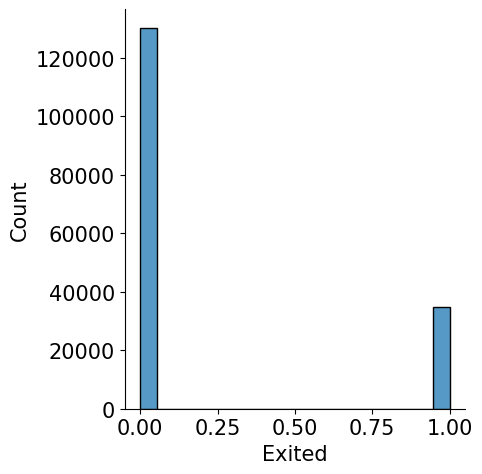

In [78]:
#EDA
#데이터시각화
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#연속: 히스토그램(커널밀도) or boxplot +범주추가가능(여러개나눠그리기)
#범주: 막대그래프(countplot도가능) or 원그래프 +범주추가가능(여러개나눠그리기)
#범주 연속 :산점도(색칠)+범주추가가능(여러개나눠그리기)
#연속 연속 :산점도 or 상관계수(히트맵)



#df
#범주(명목,5개, Surname,Exited 2개 제외): Geography, Gender ,HasCrCard, IsActiveMember, duple)
#범주(순서,1개):NumOfProducts 
#연속(6개): id, CustomerId,CreditScore,Tenure,Balance ,Surname_labelencoding, EstimatedSalary
#target이용할거임



#y값 분포(여기는 범주형변수라 countplot쓰지만  회귀의 경우는 barplot써야함+log(y)등 볼때도 있음)
mpl.rc('font',size=15)
sns.displot(df['Exited'])
#불균형 자료 분포임을 알 수 있음....roc가 괜히 쓰이는게 아니네
#언더샘플링이나 그냥을 고려해야겠다. 언더샘플링은(feature는 전체로 만들고 예측성능만보고 그냥이랑도 비교해봐야겠다.)
#데이터의 양이 많으니 괜찮을지도?

In [79]:
#교차분석표를 이용해 시각화
df['target']=df['Exited']
#Exited값은 없애준다.
df = df.drop(['Exited'], axis=1)

import matplotlib.gridspec as gridspec
#막대그래프에 퍼센트추가
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

#교차분석표만들기
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100          
    crosstab = crosstab.reset_index()
    return crosstab


#교차분석표를 이용해서 포인트 플롯을 만들어보자
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')
    
    
    
    
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

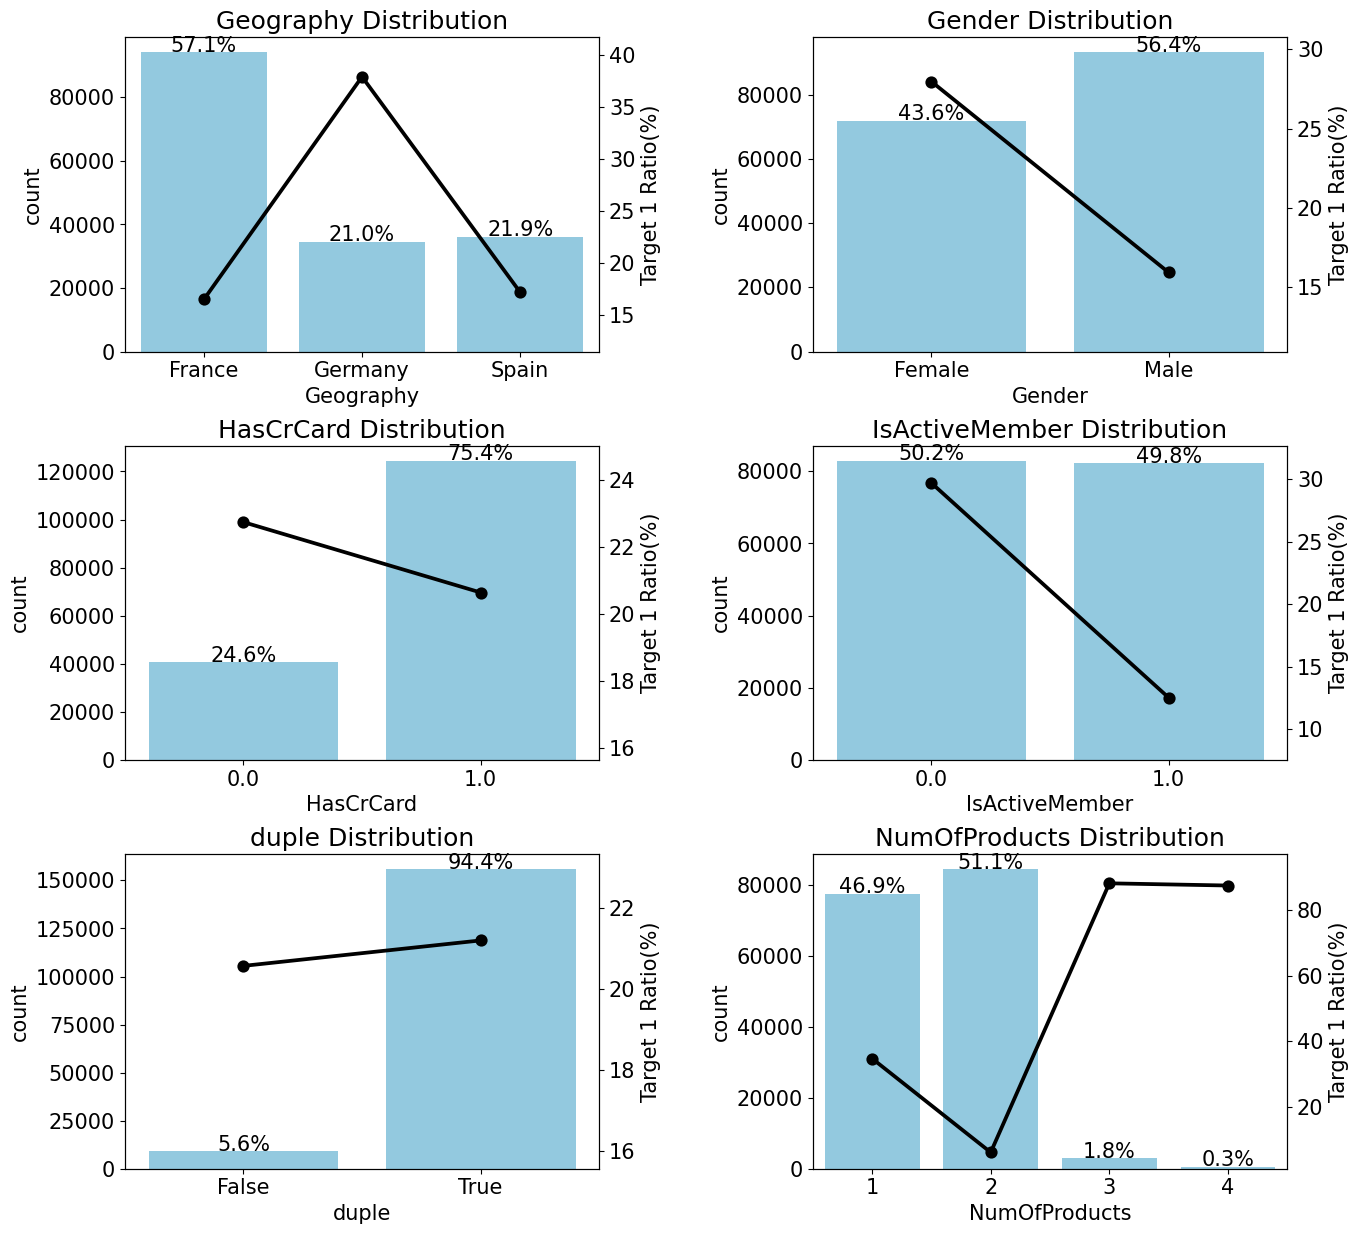

In [80]:
#범주+범주
#범주(명목+순서): 막대그래프(countplot도가능)
#130113
#CategoricalDtype()을 이용해 피처에 순서저장도가능
#해석: 막대그래프(카운트플롯)은 그냥 feature별 몇개있냐 이느낌임(크게 안중요)
#꺾은선그래프(포인트플롯)#해당 고유값중 1의 비율이다. 
#Geography에서 France는 1의 비율이 적고 Germany는 1의 비율이 많고 Spain은 적네 (이런느낌)->왔다갔다해야지 좋은거임
#순서형변수의 경우 순서가 커질수록 평탄하게 1의비율이 늘어나거나 줄어들어야지 순서의느낌이 있는거임


#범주(명목,5개, Surname,Exited 2개 제외): Geography, Gender ,HasCrCard, IsActiveMember, duple)
#범주(순서,1개):NumOfProducts
nom_features = ['Geography','Gender','HasCrCard','IsActiveMember','duple','NumOfProducts'] # 명목형 피처
plot_cat_dist_with_true_ratio(df, nom_features, num_rows=4, num_cols=2)

#해석
#duple은 막 변화가 미세하지만 1의 비율이 적잖아(중복된사람적음) 이런 사람들은 exited잘안함->중복됬다는건
#NumOfProducts같은 경우는 2일때 갑자기 1의 비율이 떨어짐 근데3~4는 늘어남 왜?
#duple이라는 변수가 유의한지 확인해야할 필요가 있음


In [81]:
#creditScore에서 850이 몇번등장할까요? 없으면0반환
df['CreditScore'].value_counts().get(850,0)


2532

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

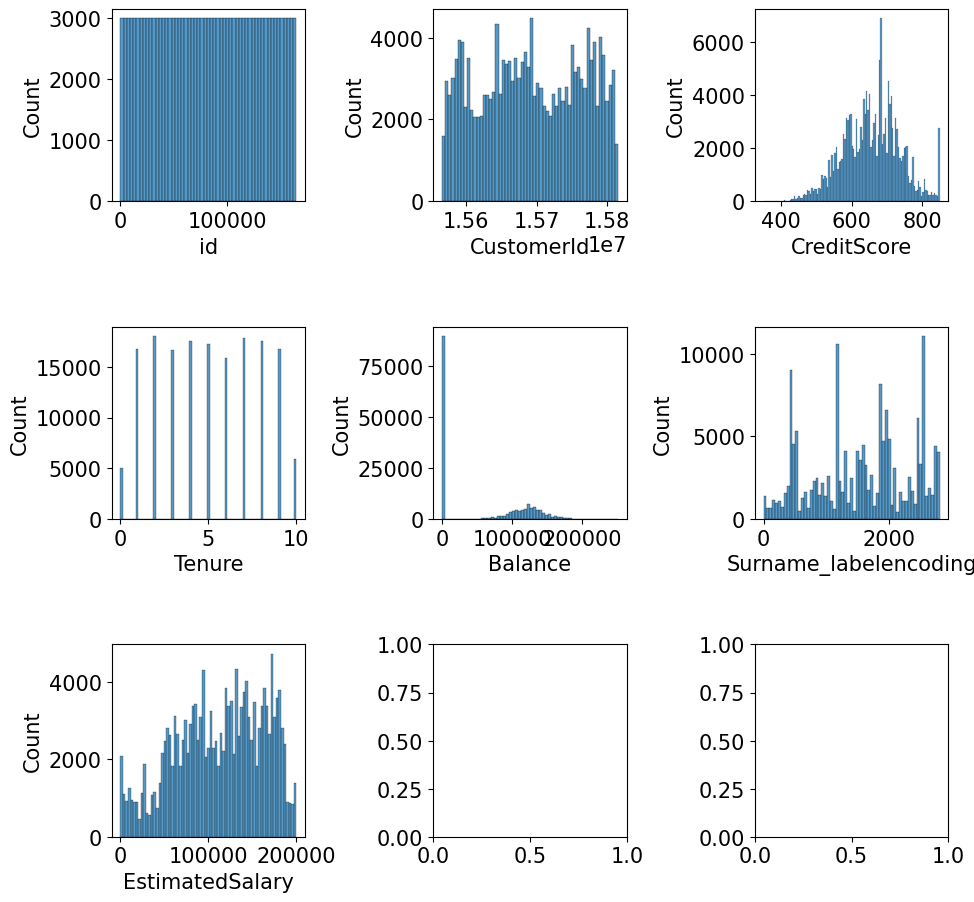

In [82]:
#연속형변수 각각에 대한 히스토그램 (범주형은 위에서 countplot했음)
cont_features = ['id', 'CustomerId','CreditScore','Tenure','Balance' ,'Surname_labelencoding', 'EstimatedSalary']

# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=3, ncols=3) # 2행 3열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
sns.histplot(data=df,x='id',ax=axes[0,0])
sns.histplot(data=df,x='CustomerId',ax=axes[0,1])
sns.histplot(data=df,x='CreditScore',ax=axes[0,2])
sns.histplot(data=df,x='Tenure',ax=axes[1,0])
sns.histplot(data=df,x='Balance',ax=axes[1,1])
sns.histplot(data=df,x='Surname_labelencoding',ax=axes[1,2])
sns.histplot(data=df,x='EstimatedSalary',ax=axes[2,0])

#Balance 0인지 아닌지 유무에 대한 feature도 만들어줘야겠네
#CreditScore도 봐야함

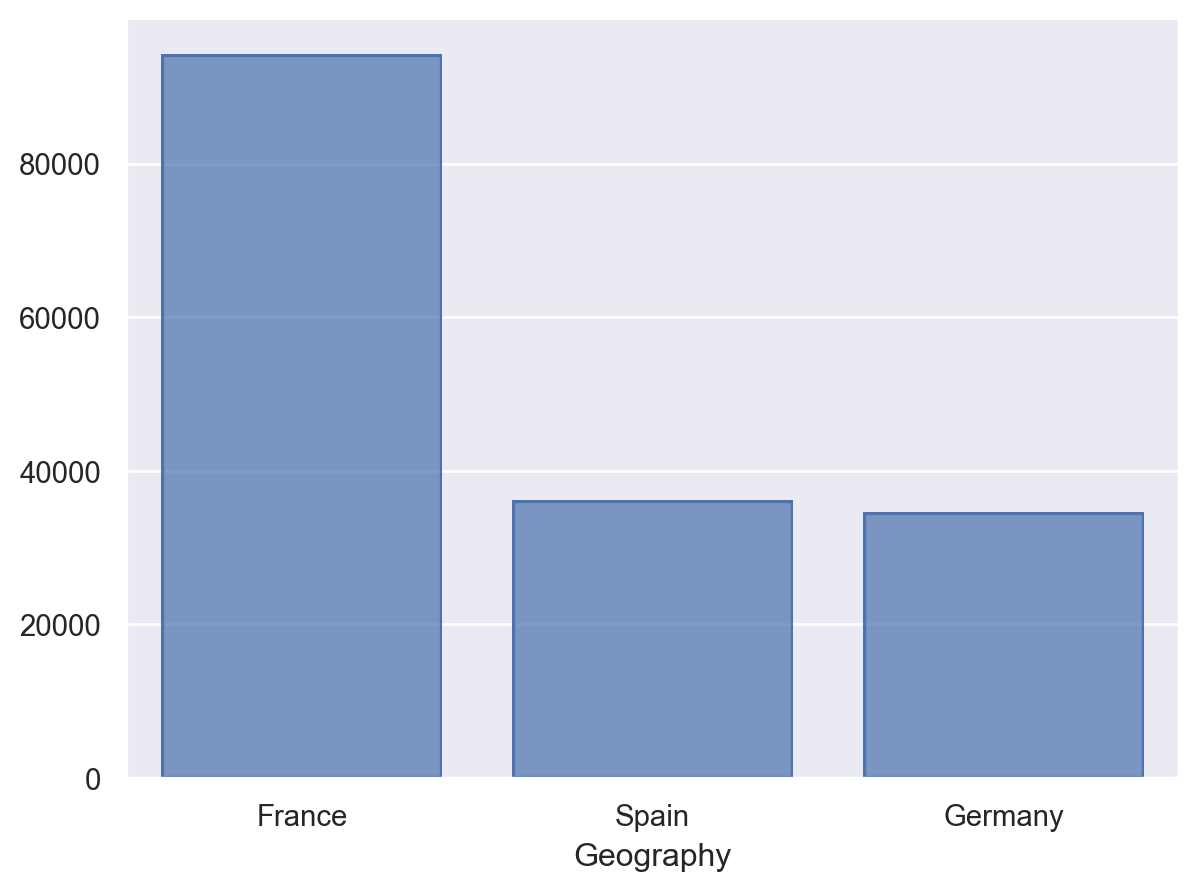

In [83]:
(
    so.Plot(df, x="Geography")
    .add(so.Bar(), so.Count())
)

<Axes: xlabel='target', ylabel='EstimatedSalary'>

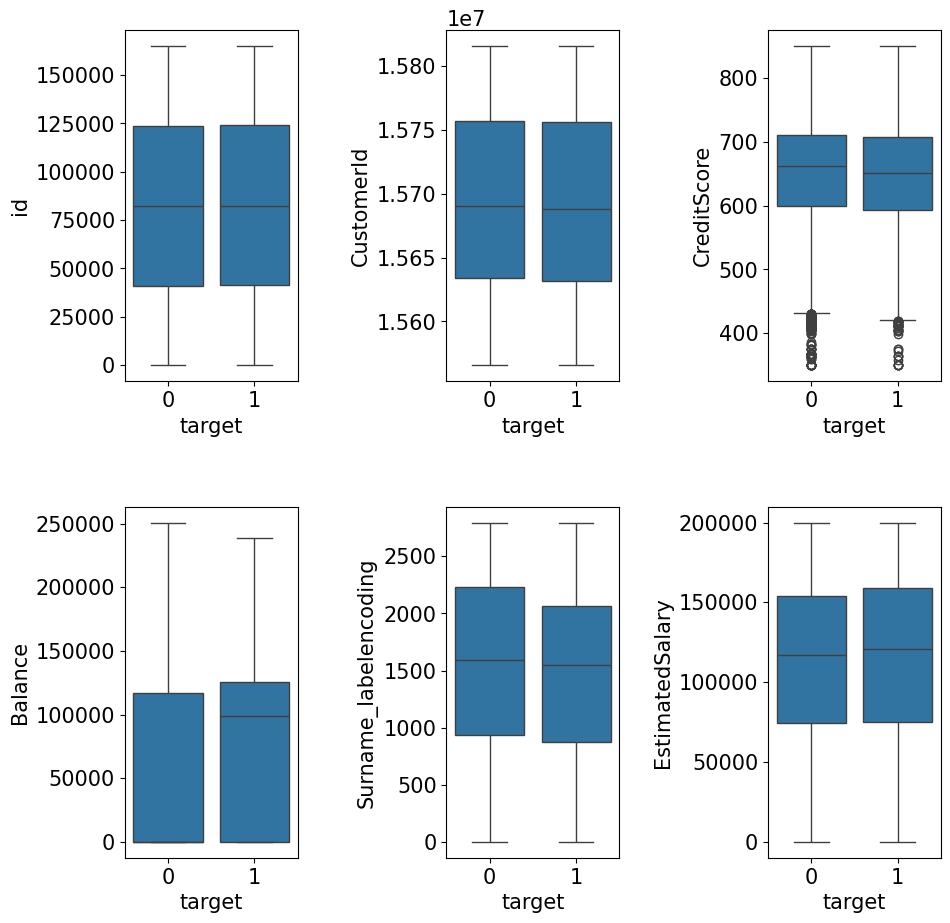

In [84]:
#범주+연속(박스플롯)
#연속(5개): id, CustomerId,CreditScore,Tenure,Balance ,Surname_labelencoding, EstimatedSalary
#범주:target




#데이터 시각화2
#계절,날씨,공휴일,근무일별 대여 수량을 박스플롯으로 그려보겠다

# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=3) # 2행 3열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='target', y='id', data=df, ax=axes[0, 0])
sns.boxplot(x='target', y='CustomerId', data=df, ax=axes[0, 1])
sns.boxplot(x='target', y='CreditScore', data=df, ax=axes[0, 2])
sns.boxplot(x='target', y='Balance', data=df, ax=axes[1, 0])
sns.boxplot(x='target', y='Surname_labelencoding', data=df, ax=axes[1, 1])
sns.boxplot(x='target', y='EstimatedSalary', data=df, ax=axes[1, 2])



#해석: id랑 customerid는 빼도될듯? Balance가 애매함

In [85]:
#범주+범주나 범주+연속(bar플롯)
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target',hue=feature, data=df, palette='Set2', ax=ax)





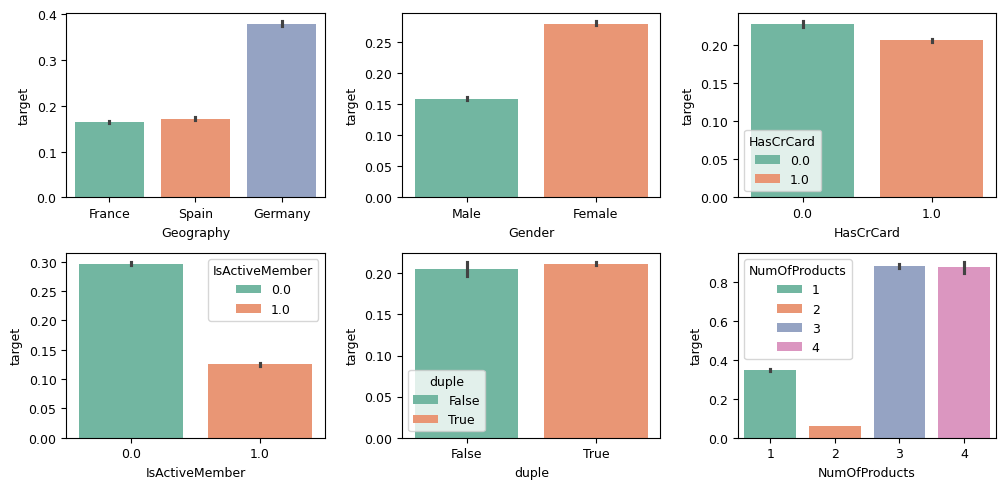

In [86]:
#범주+범주
nom_features = ['Geography','Gender','HasCrCard','IsActiveMember','duple','NumOfProducts']
plot_target_ratio_by_features(df, nom_features, 6, 3) # 6행 3열 배치

#해석: 고유값별 target값 비율이다. 완전임의의 범주형변수라면 이비율은 다를 수 밖에 없다.
#또한 위의 막대그래프는 카운트플롯이고 이건 진짜 막대그래프이다. 둘이 의미가 다르다.
#여기의 막대그래프가 위에서 그린 그래프에서 꺾은선그래프와 완전히 동일하다.
#통계적해석: 위의 선이 크면 통계적으로 신뢰구간이 왔다갔다 함으로 좋지 않다는 것이다.


#spain과 France를 나눌필요가있나?
#NumOfProducts3과 4를 나눌필요가 있나?
#duple이 진짜 비슷해서 의미없는 정도였는데 통계적유의성도 아쉽네...

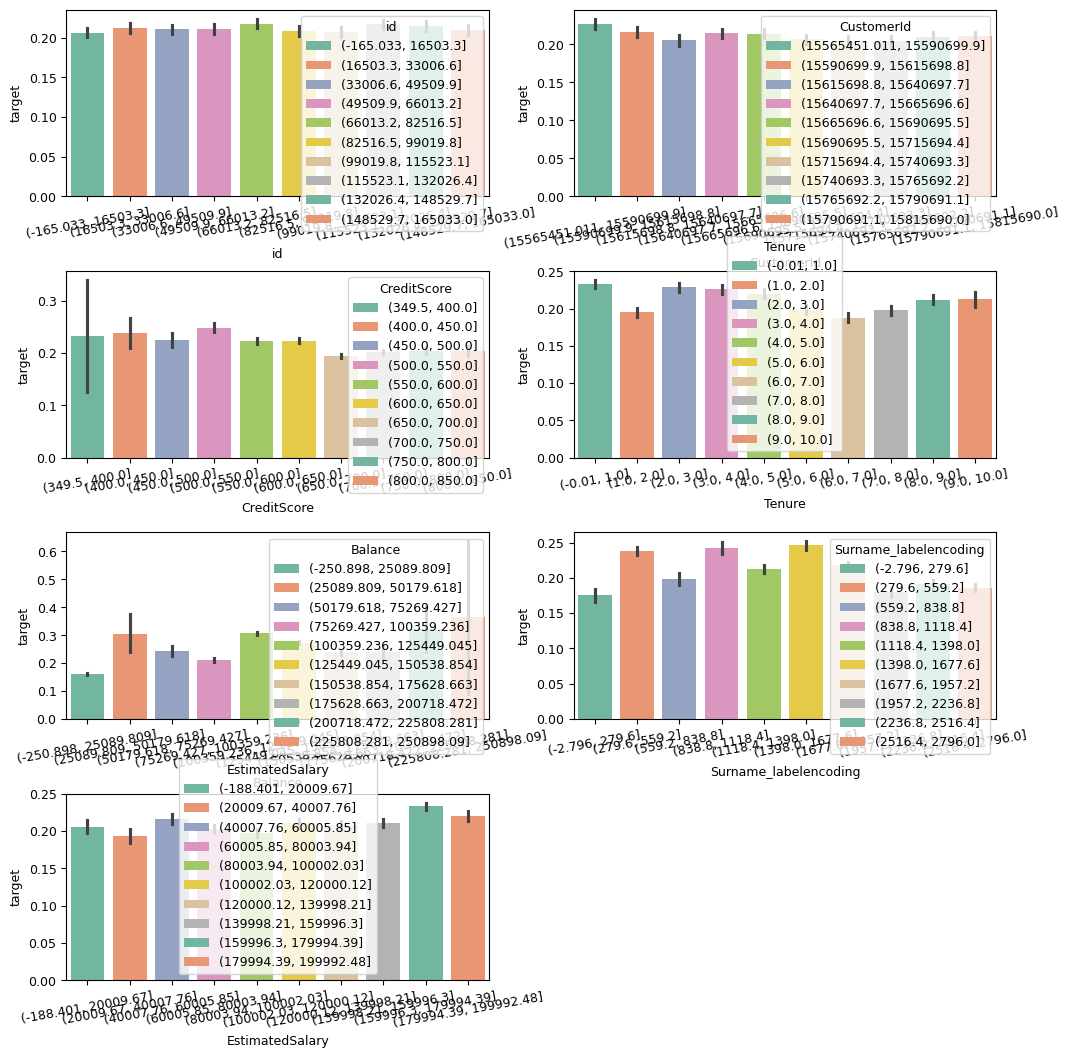

In [87]:
#범주+연속(cut으로 자르기가 귀찮지만 해야함 안그러면 정확하게 볼 수가 없음 박스플롯으로는 못보는게 숨겨져있을 수 있음)
#연속형피처
cont_features = ['id', 'CustomerId','CreditScore','Tenure','Balance' ,'Surname_labelencoding', 'EstimatedSalary']

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 10개 구간으로 나누기(시작할 때 보통은 5개정도로 나눔)
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target',hue=cont_feature, data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

    
#구간별 타깃값 차이가 없는걸 구하면됨
#id없고 CustomerId가 있는게 너무슬프네 하
#고유값대로 label encoding해줬어야하나...나중에하자
#Balance 20만관련해서 높은쪽이 너무 말이안됨...유의미하지않다.이말임

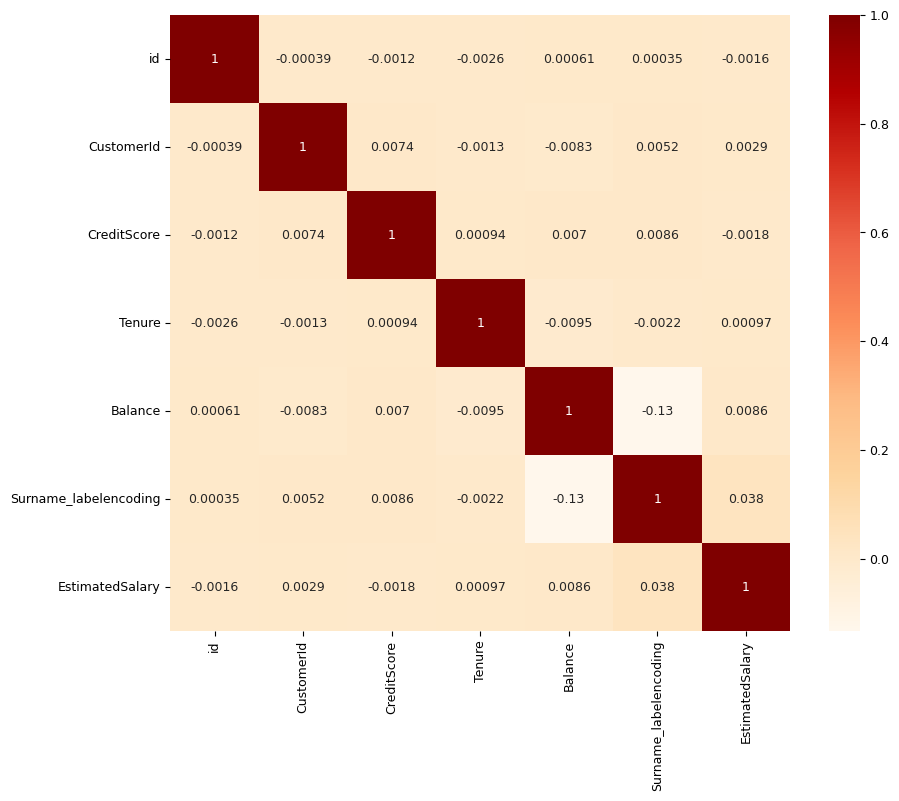

In [57]:
#연속+연속(상관계수,히트맵)
plt.figure(figsize=(10, 8))
cont_corr = df[cont_features].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기

In [58]:
#밸런스 20만 이하이상관련해서 한번 살펴보고싶어
#나눈다음에 그래프를 통해 평균을 보는 방법과
#로지스틱회귀분석을 통해 보는 방법이 있어
#그래프를 통해 평균을 본다고해서 차이가 있는건 사실 위에서 보면 있긴함...but 어마어마한 신뢰구간통계문제가 있는데
#이와 관련하여 20만보다크냐작냐에 대한 변수를 만들어야할지 아니면 로지스틱회귀분석을 통해
#연속일때의 유의성과 범주관련된 유의성을 봐야할필요가 있음

#이경우 제거하거나 0과1을 넣어보자
df['Balance2'] = (df['Balance'] > 200000).astype(int)


In [59]:
#EDA(통계를 이용한 확인):로지스틱회귀분석
import scipy as stats#수학(통계)
import statsmodels.api as sm #통계
import statsmodels.formula.api as smf #통계sm.add_constant()필요없음

In [60]:
#원핫인코딩(로지스틱할려면 0,1로 되어있는거 빼고 다해줘야한다..)
#'Geography','Gender','duple','NumOfProducts' 해줘야함.
#0,1도 object라면 int로 해야되는거 아닌가....ㄴㄴ안해줘도됨 이정도는 인지해줌(stats모델은 자동으로 이진변수를 더미변수로 만들어줌)
#결론: 연속형은 연속형 범주는 0,1이면 object나 int나 노상관 0과1아닌건 무조건 onehot
#원래는 이진변수 그것도 int형 0,1빼고 안되지만 statsmodel이 이진변수 형태의 더미변수로 만들어줌

#0. 로지스틱은 종속변수가 int나 boolean이어야함
df['target']=df['target'].astype("int")

#1.Geography
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Geography']]), columns=encoder.get_feature_names_out(['Geography']))
# 기존 데이터프레임에서 'Geography' 열 제거
df = df.drop(['Geography'], axis=1)
# 인코딩된 결과를 기존 데이터프레임에 합치기
df = pd.concat([df, df_encoded], axis=1)

#2.Gender
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Gender']]), columns=encoder.get_feature_names_out(['Gender']))
# 기존 데이터프레임에서 'Geography' 열 제거
df = df.drop(['Gender'], axis=1)
# 인코딩된 결과를 기존 데이터프레임에 합치기
df = pd.concat([df, df_encoded], axis=1)


#3.duple
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['duple']]), columns=encoder.get_feature_names_out(['duple']))
# 기존 데이터프레임에서 'Geography' 열 제거
df = df.drop(['duple'], axis=1)
# 인코딩된 결과를 기존 데이터프레임에 합치기
df = pd.concat([df, df_encoded], axis=1)

#4.NumOfProducts
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['NumOfProducts']]), columns=encoder.get_feature_names_out(['NumOfProducts']))
# 기존 데이터프레임에서 'Geography' 열 제거
df = df.drop(['NumOfProducts'], axis=1)
# 인코딩된 결과를 기존 데이터프레임에 합치기
df = pd.concat([df, df_encoded], axis=1)








In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     165034 non-null  int64  
 1   CustomerId             165034 non-null  int64  
 2   Surname                165034 non-null  object 
 3   CreditScore            165034 non-null  int64  
 4   Age                    165034 non-null  float64
 5   Tenure                 165034 non-null  int64  
 6   Balance                165034 non-null  float64
 7   HasCrCard              165034 non-null  object 
 8   IsActiveMember         165034 non-null  object 
 9   EstimatedSalary        165034 non-null  float64
 10  Surname_labelencoding  165034 non-null  int32  
 11  target                 165034 non-null  int32  
 12  Balance2               165034 non-null  int32  
 13  Geography_Germany      165034 non-null  float64
 14  Geography_Spain        165034 non-nu

In [62]:
# 로지스틱 회귀 모델 생성 및 적합(앞에서본대로 id와 CustomerId Surname뺌)
mod = smf.logit("target ~ CreditScore+Age+Tenure+Balance+HasCrCard+IsActiveMember+EstimatedSalary+Surname_labelencoding+Geography_Germany+Geography_Spain+Gender_Male++duple_True+NumOfProducts_2+NumOfProducts_3+NumOfProducts_4",data=df)
result = mod.fit()
# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344095
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               165034
Model:                          Logit   Df Residuals:                   165018
Method:                           MLE   Df Model:                           15
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.3332
Time:                        23:31:56   Log-Likelihood:                -56787.
converged:                       True   LL-Null:                       -85169.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.7636      0.084    -33.076      0.000      -2.927      -2.

In [63]:
#결국 모델링에서의 로지스틱회귀의 역할 feature engineering을 위한 interaction을 찾는정도다..
#아니면 변수변환(로그,나눗셈등등의 값을 찾아보거나)
#baseline은 lightgbm이 맞다.




#interaction찾기 쉽지 않아.........허허
#CreditScore+Age+Tenure+Balance+HasCrCard+IsActiveMember+EstimatedSalary+Surname_labelencoding+Geography_Germany+Geography_Spain+Gender_Male++duple_True+NumOfProducts_2+NumOfProducts_3+NumOfProducts_4
mod = smf.logit("target ~ Balance+Balance2",data=df)
result = mod.fit()
# 결과 출력
print(result.summary())

#내개인적인 생각인데 상호작용은 범주범주만 찾아도 괜찮을듯 오히려 범주범주가 컴퓨터 입장에서 고려해야할게 많네
#


Optimization terminated successfully.
         Current function value: 0.507767
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               165034
Model:                          Logit   Df Residuals:                   165031
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.01608
Time:                        23:31:56   Log-Likelihood:                -83799.
converged:                       True   LL-Null:                       -85169.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6194      0.009   -184.183      0.000      -1.637      -1.602
Balance     4.978e-06   9.54e

In [64]:
# 로그 우도 검정을 위한 두 모델
mod1 = smf.logit("target ~ CreditScore + Age + Tenure + Balance + HasCrCard + IsActiveMember + EstimatedSalary + Surname_labelencoding + Geography_Germany + Geography_Spain + Gender_Male + duple_True + NumOfProducts_2 + NumOfProducts_3 + NumOfProducts_4", data=df)
result1 = mod1.fit()

mod2 = smf.logit("target ~ Balance2+CreditScore + Age + Tenure + Balance + HasCrCard + IsActiveMember + EstimatedSalary + Surname_labelencoding + Geography_Germany + Geography_Spain + Gender_Male + duple_True + NumOfProducts_2 + NumOfProducts_3 + NumOfProducts_4", data=df)
result2 = mod2.fit()


# 결과 출력
print(result2.summary())
print(result1.aic)
#113606.74467043829
#113595

from scipy.stats import chi2
# 두 모델의 로그 우도 차이 계산
log_likelihood_model1 = result1.llf
log_likelihood_model2 = result2.llf
likelihood_ratio_test = 2 * (log_likelihood_model2 - log_likelihood_model1)

# 자유도 계산
dff = len(result2.params) - len(result1.params)

# p-value 계산
p_value = 1 - chi2.cdf(likelihood_ratio_test, dff)
p_value



Optimization terminated successfully.
         Current function value: 0.344095
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344055
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               165034
Model:                          Logit   Df Residuals:                   165017
Method:                           MLE   Df Model:                           16
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.3333
Time:                        23:32:00   Log-Likelihood:                -56781.
converged:                       True   LL-Null:                       -85169.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

0.00028545932876611335

In [65]:
mod2 = smf.logit("target ~ Balance2+CreditScore + Age + Tenure + Balance + HasCrCard + IsActiveMember + EstimatedSalary + Surname_labelencoding + Geography_Germany + Geography_Spain + Gender_Male + duple_True + NumOfProducts_2 + NumOfProducts_3 + NumOfProducts_4", data=df)
result2 = mod2.fit()

Optimization terminated successfully.
         Current function value: 0.344055
         Iterations 7


In [ ]:
#간단한 전처리(feature engineering)
df=train

#중복값이면 1아니면 0인 feature를 df에 추가한다.
df['duple'] = df['CustomerId'].duplicated(keep=False).astype(int)









#인코딩(모델링부분에서 할 것)

#1.HasCrCard,IsActiveMember,EstimatedSalary,Exited 4가지는 범주형으로(이미 숫자) 
df['HasCrCard'] = df['HasCrCard'].astype('object')
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['EstimatedSalary'] = df['EstimatedSalary'].astype('object')
df['Exited'] = df['Exited'].astype('object')


#2.NumOfProducts는 카테고리형으로(이미 숫자고 순서적용)->이미 숫자아니면 뒤에다가 .cat.codes진행
df['NumOfProducts'] = df['NumOfProducts'].astype('category')


#3.Geography와 Gender는 object지만 나중을 위해 숫자로 변환
#3개니까 Geography 원핫 인코딩 진행(순서를 고려해야할경우는 label인코딩을 해야함)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Geography']]), columns=encoder.get_feature_names_out(['Geography']))
# 기존 데이터프레임에서 'Geography' 열 제거
df = df.drop(['Geography'], axis=1)
# 인코딩된 결과를 기존 데이터프레임에 합치기
df = pd.concat([df, df_encoded], axis=1)


#2개니까 gender는 원핫인코딩필요 없음 레이블 인코디진행
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#레이블을 object로 변환
df['Gender'] = df['Gender'].astype('object')


#4.Surname과 관련된 타깃 인코딩
from category_encoders import TargetEncoder
# 특성과 타겟을 나누기
X = df.drop('Exited', axis=1)
y = df['Exited']
# TargetEncoder 생성 및 인코딩
encoder = TargetEncoder(cols=['Surname'])
df= encoder.fit_transform(X, y)
#바꾼 Surname의 feature가 연속이다. object형태로 되어있기에 변환해준다.
df['Surname_targetencoding'] = df['Surname'].astype('float')

#5.Surname과 관련된 label인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Surname_labelencoding'] = label_encoder.fit_transform(df['Surname'])




df_encoded
